# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#pd.set_option('precision', 3)

titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

In [2]:
titanic_df.sample(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
834,835,0,3,"Allum, Mr. Owen George",male,18.0,0,0,2223,8.3000,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S


In [3]:
titanic_df.isnull().sum()

#df[''].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
cleaned_df = titanic_df.drop('Cabin', axis = 'columns')
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
cleaned_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [8]:
import matplotlib.pyplot as plt


In [10]:
ATTRS = ["Survived","Pclass", "Age", "SibSp", "Parch", "Fare"]

cleaned_df[ATTRS].corr('pearson')

#cleaned_df.corr()['Survived']
cleaned_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
cleaned_df[ATTRS].corr('pearson') <= -0.3

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,False,True,False,False,False,False
Pclass,True,False,True,False,False,True
Age,False,True,False,True,False,False
SibSp,False,False,True,False,False,False
Parch,False,False,False,False,False,False
Fare,False,True,False,False,False,False


In [12]:
cleaned_df[ATTRS].corr('pearson') >= 0.3

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,True,False,False,False,False,False
Pclass,False,True,False,False,False,False
Age,False,False,True,False,False,False
SibSp,False,False,False,True,True,False
Parch,False,False,False,True,True,False
Fare,False,False,False,False,False,True


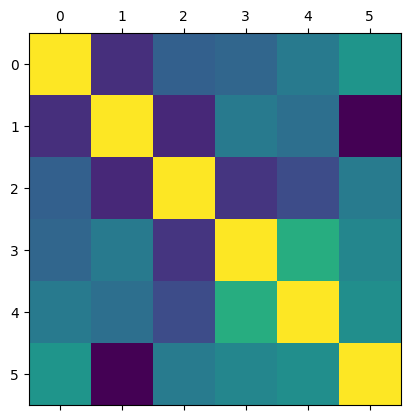

In [13]:
plt.matshow(cleaned_df[ATTRS].corr(), )
plt.show()

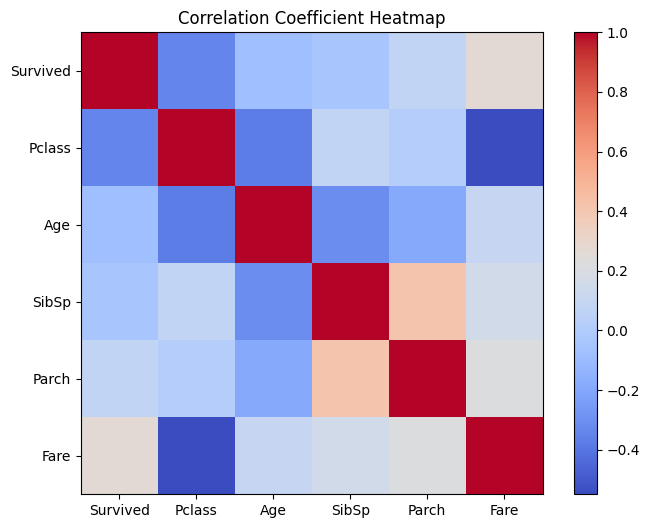

In [14]:
correlation_matrix = cleaned_df[ATTRS].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Customize the plot
plt.xticks(range(len(correlation_matrix)), ATTRS)
plt.yticks(range(len(correlation_matrix)), ATTRS)
plt.title('Correlation Coefficient Heatmap')

# Display the plot
plt.show()

## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

In [15]:
# new column for ismale - convert 'male' to a number for analysis

titanic_df['IsMale'] = 0

titanic_df.loc[titanic_df['Sex']=='male','IsMale'] = 1


#new column for IsAdult - simple binary choice of adult (1) and child (0) + None (where age is NaN)

titanic_df['IsAdult'] = None
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = 1     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = 0     #child


# SHORT HAND

print("short hand:")
print( titanic_df.groupby(['IsAdult','IsMale'])['Survived'].mean()*100 )


short hand:
IsAdult  IsMale
0        0         69.090909
         1         39.655172
1        0         77.184466
         1         17.721519
Name: Survived, dtype: float64


In [16]:
#Adding labels for categories

titanic_df['adult_type'] = "NONE"
titanic_df.loc[titanic_df['Age']>=18,'adult_type'] = "Adult"     #adult
titanic_df.loc[titanic_df['Age']<18,'adult_type'] = "Child"     #child

titanic_df.groupby(['adult_type','Sex'])['Survived'].mean()*100

adult_type  Sex   
Adult       female    77.184466
            male      17.721519
Child       female    69.090909
            male      39.655172
NONE        female    67.924528
            male      12.903226
Name: Survived, dtype: float64

# Matplotlib representation

In [17]:
#Adding labels for categories

titanic_df['adult_type'] = "NONE"
titanic_df.loc[titanic_df['Age']>=18,'adult_type'] = "Adult"     #adult
titanic_df.loc[titanic_df['Age']>=50,'adult_type'] = "Senior"     #senior
titanic_df.loc[titanic_df['Age']<18,'adult_type'] = "Child"     #child

# short hand
titanic_df.groupby(['adult_type','Sex'])['Survived'].mean()*100

adult_type  Sex   
Adult       female    75.543478
            male      18.367347
Child       female    69.090909
            male      39.655172
NONE        female    67.924528
            male      12.903226
Senior      female    90.909091
            male      13.461538
Name: Survived, dtype: float64

In [18]:
aged_df = titanic_df[~titanic_df['IsAdult'].isnull()]

prop_surved = aged_df.groupby(['IsAdult','IsMale'])['Survived'].sum()

aged_df.groupby(['IsAdult','IsMale', 'Survived'])[['Embarked']].count()
# prop_surved

Embarked
IsAdult IsMale Survived          
0       0      0               17
               1               38
        1      0               35
               1               23
1       0      0               47
               1              157
        1      0              325
               1               70

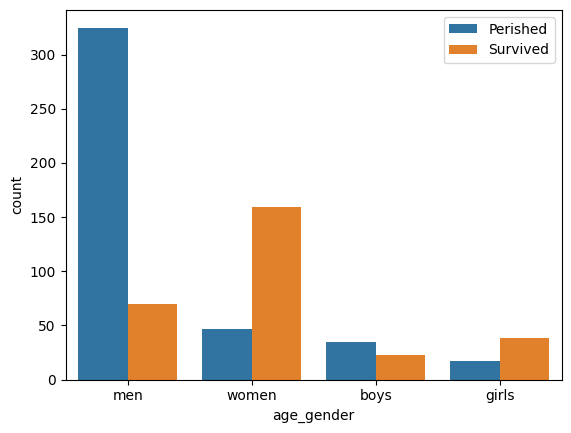

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore pandas warnings
warnings.filterwarnings('ignore')

def get_age_gender(row):
    if row['IsAdult']:
        if row['IsMale']:
            return 'men'
        return 'women'
    else:
        if row['IsMale']:
            return 'boys'
        return 'girls'

aged_df['age_gender'] = aged_df.apply(get_age_gender, axis=1) 
sns.countplot(data=aged_df, x='age_gender', hue='Survived')
# new legend labels died and survived:
plt.legend(title='', loc='upper right', labels=['Perished', 'Survived'])

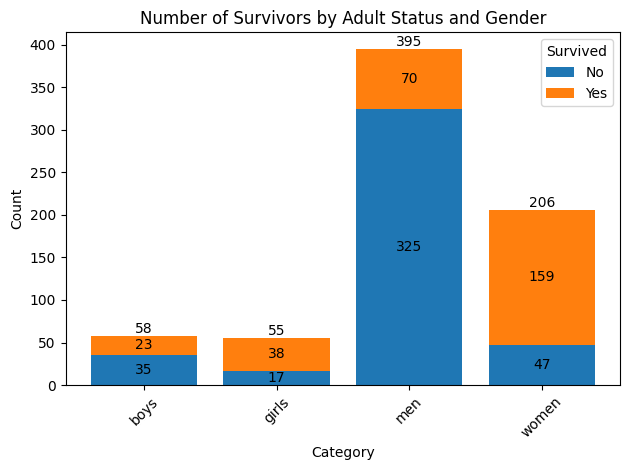

In [20]:
counts = aged_df.groupby(['age_gender', 'Survived']).size().unstack()

# Plot
fig, ax = plt.subplots()
p1 = ax.bar(counts.index, counts[0], label='No')
p2 = ax.bar(counts.index, counts[1], bottom=counts[0], label='Yes')
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

# counts.plot(kind='bar', stacked=True)
plt.title('Number of Survivors by Adult Status and Gender')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

## Exercise 4: Did class played role in survival ?

In [22]:
# 1st 
# 2nd 
# 3rd 

titanic_df.groupby(['Pclass','Sex'])['Survived'].mean()*100



Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.

In [25]:
# **sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

# **parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

# if sibsp and parch == 0 

titanic_df['IsAlone'] = 'Alone'
titanic_df.loc[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0),'IsAlone'] = 'Not alone'  #alone

tot = [0,0]
tot[0] = sum(titanic_df['IsAlone'] == 'Alone')
tot[1] = sum(titanic_df['IsAlone'] == 'Not alone')

sur_mean = titanic_df.groupby('IsAlone')['Survived'].mean()
sur_tot = titanic_df.groupby('IsAlone')['Survived'].sum()

alone_df = {'Total': tot, 'Survived Tot': sur_tot, 'Percentage of Survival': round(sur_mean*100)}

pd.DataFrame(alone_df)


,Total,Survived Tot,Percentage of Survival
IsAlone,,,
Alone,537,163,30.0
Not alone,354,179,51.0
